In [64]:
import os
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
from lasagne.layers import DenseLayer
from lasagne.layers import InputLayer
from lasagne.layers import DropoutLayer
from lasagne.layers import Conv2DLayer
from lasagne.layers import MaxPool2DLayer
from lasagne.nonlinearities import softmax
from lasagne.updates import adam
from lasagne.updates import nesterov_momentum
from lasagne.layers import get_all_params
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import TrainSplit
from nolearn.lasagne import objective

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Shape of tr_images is:  (32, 32, 2925)
(2925, 1, 32, 32)
(2925,)
(1, 32, 32)
(2925,)


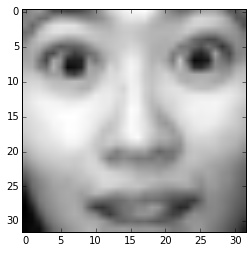

In [65]:
import scipy.io
train = scipy.io.loadmat('labeled_images.mat')
print "Shape of tr_images is: ", train["tr_images"].shape
(x_size, y_size, n_images) = train["tr_images"].shape
X = np.reshape(np.swapaxes(train["tr_images"], 0, 2), (n_images, 1, x_size, y_size))
y = train["tr_labels"].ravel()-1
print X.shape
print y.shape
X = np.array(X).astype(np.float32)
y = np.array(y).astype(np.int32)
# Normalization
X -= X.mean()
X /= X.std()
print X[0].shape
print y.shape


#plt.imshow(np.swapaxes(np.reshape(X[0], (y_size, x_size)), 0, 1), cmap=pylab.gray())
#plt.show()

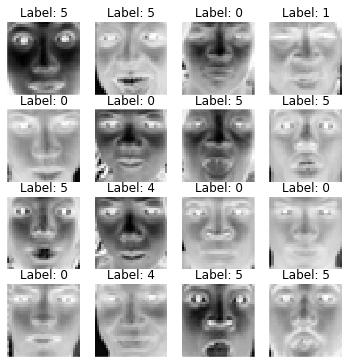

In [91]:
# Show labels of the dataset
figs, axes = plt.subplots(4, 4, figsize=(6, 6))
for i in range(4):
    for j in range(4):
        axes[i, j].imshow(np.swapaxes(-X[i + 4 * j].reshape(32, 32), 0, 1), interpolation='none')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_title("Label: {}".format(y[i + 4 * j]))
        axes[i, j].axis('off')

In [96]:
layers0 = [
    # layer dealing with the input data
    (InputLayer, {'shape': (None, X.shape[1], X.shape[2], X.shape[3])}),

    # first stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 96, 'filter_size': 5}),
    (Conv2DLayer, {'num_filters': 96, 'filter_size': 3}),
    (Conv2DLayer, {'num_filters': 96, 'filter_size': 3}),
    (Conv2DLayer, {'num_filters': 96, 'filter_size': 3}),
    (Conv2DLayer, {'num_filters': 96, 'filter_size': 3}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # second stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 128, 'filter_size': 3}),
    (Conv2DLayer, {'num_filters': 128, 'filter_size': 3}),
    (Conv2DLayer, {'num_filters': 128, 'filter_size': 3}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # two dense layers with dropout
    (DenseLayer, {'num_units': 64}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 64}),

    # the output layer
    (DenseLayer, {'num_units': 7, 'nonlinearity': softmax}),
]

layers1 = [
    # layer dealing with the input data
    (InputLayer, {'shape': (None, X.shape[1], X.shape[2], X.shape[3])}),

    # first stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 48, 'filter_size': 5}),
    (Conv2DLayer, {'num_filters': 48, 'filter_size': 3}),
    (Conv2DLayer, {'num_filters': 48, 'filter_size': 3}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # second stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 64, 'filter_size': 5}),
    (Conv2DLayer, {'num_filters': 64, 'filter_size': 3}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # two dense layers with dropout
    (DenseLayer, {'num_units': 32}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 32}),

    # the output layer
    (DenseLayer, {'num_units': 7, 'nonlinearity': softmax}),
]

layers2 = [
    (InputLayer, {'shape': (None, X.shape[1], X.shape[2], X.shape[3])}),

    (Conv2DLayer, {'num_filters': 32, 'filter_size': (3, 3)}),
    (MaxPool2DLayer, {'pool_size': (2, 2)}),

    (Conv2DLayer, {'num_filters': 64, 'filter_size': (3, 3)}),
    (Conv2DLayer, {'num_filters': 64, 'filter_size': (3, 3)}),
    (MaxPool2DLayer, {'pool_size': (2, 2)}),

    (Conv2DLayer, {'num_filters': 96, 'filter_size': (3, 3)}),
    (MaxPool2DLayer, {'pool_size': (2, 2)}),

    (DenseLayer, {'num_units': 64}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 64}),

    (DenseLayer, {'num_units': 7, 'nonlinearity': softmax}),
]

layers3 = [
    (InputLayer, {'shape': (None, X.shape[1], X.shape[2], X.shape[3])}),
    (Conv2DLayer, {'num_filters': 96, 'filter_size': (5, 5)}),
    (MaxPool2DLayer, {'pool_size': (2, 2)}),
    (Conv2DLayer, {'num_filters': 64, 'filter_size': (5, 5)}),
    (MaxPool2DLayer, {'pool_size': (2, 2)}),
    (DenseLayer, {'num_units': 64}),
    (DenseLayer, {'num_units': 7, 'nonlinearity': softmax}),
]

layers4 = [
    (InputLayer, {'shape': (None, X.shape[1], X.shape[2], X.shape[3])}),
    (Conv2DLayer, {'num_filters': 14, 'filter_size': (5, 5)}),
    (MaxPool2DLayer, {'pool_size': (2, 2)}),
    (Conv2DLayer, {'num_filters': 14, 'filter_size': (11, 11)}),
    (MaxPool2DLayer, {'pool_size': (2, 2)}),
    (DenseLayer, {'num_units': 32}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 32}),
    (DenseLayer, {'num_units': 7, 'nonlinearity': softmax}),
]

In [97]:
def regularization_objective(layers, lambda1=0., lambda2=0., *args, **kwargs):
    # default loss
    losses = objective(layers, *args, **kwargs)
    # get the layers' weights, but only those that should be regularized
    # (i.e. not the biases)
    weights = get_all_params(layers[-1], regularizable=True)
    # sum of absolute weights for L1
    sum_abs_weights = sum([abs(w).sum() for w in weights])
    # sum of squared weights for L2
    sum_squared_weights = sum([(w ** 2).sum() for w in weights])
    # add weights to regular loss
    losses += lambda1 * sum_abs_weights + lambda2 * sum_squared_weights
    return losses

In [98]:
net1 = NeuralNet(
    layers=layers5,
    max_epochs=40,

    #update=nesterov_momentum,
    update=nesterov_momentum,
    update_learning_rate=0.004,
    update_momentum=0.6,
    #update_learning_rate=0.0003,

    objective=regularization_objective,
    objective_lambda2=0.0015,

    train_split=TrainSplit(eval_size=0.25),
    verbose=4,
)

In [99]:
net1.fit(X, y)

# Neural Network with 30510 learnable parameters

## Layer information

name        size        total    cap.Y    cap.X    cov.Y    cov.X    filter Y    filter X    field Y    field X
----------  --------  -------  -------  -------  -------  -------  ----------  ----------  ---------  ---------
input0      1x32x32      1024   100.00   100.00   100.00   100.00          32          32         32         32
conv2d1     14x28x28    10976   100.00   100.00    15.62    15.62           5           5          5          5
maxpool2d2  14x14x14     2744   100.00   100.00    15.62    15.62           5           5          5          5
dropout3    14x14x14     2744   100.00   100.00   100.00   100.00          32          32         32         32
conv2d4     21x6x6        756   100.00   100.00   100.00   100.00          32          32         32         32
maxpool2d5  21x3x3        189   100.00   100.00   100.00   100.00          32          32         32         32
dropout6    21x3x3        189   

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x1077bf210>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x1077bf190>,
     custom_score=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 32, 32)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'filter_size': (5, 5), 'num_filters': 14}), (<class 'lasagne.layers.pool.MaxPool2DLayer'>, {'pool_size': (2, 2)}), (<class 'lasagne.layers.noise.DropoutLayer'>, {}), (<clas...gne.layers.dense.DenseLayer'>, {'num_units': 7, 'nonlinearity': <function softmax at 0x1073549b0>})],
     loss=None, max_epochs=40, more_params={},
     objective=<function regularization_objective at 0x122d03aa0>,
     objective_lambda2=0.0015,
     objective_loss_function=<function categorical_crossentropy at 0x1074b1758>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x1164eba70>],
     on_training_finished=

In [47]:
net1.save_params_to ('CNN_two_layers_small_filters')

In [48]:
def classify_pub_test(classifier):
    pub_test = scipy.io.loadmat('public_test_images.mat')
    hid_test = scipy.io.loadmat('hidden_test_images.mat')
    
    (x, y, n_images) = pub_test["public_test_images"].shape
    test_img = np.reshape(np.swapaxes(pub_test["public_test_images"], 0, 2), (n_images, 1, x, y))
    test_img = np.array(test_img).astype(np.float32)
    test_img -= test_img.mean()
    test_img /= test_img.std()
    pub_res = list(classifier.predict(test_img)+1)
    
    (x, y, n_images) = hid_test["hidden_test_images"].shape
    test_img = np.reshape(np.swapaxes(hid_test["hidden_test_images"], 0, 2), (n_images, 1, x, y))
    test_img = np.array(test_img).astype(np.float32)
    test_img -= test_img.mean()
    test_img /= test_img.std()
    hid_res = list(classifier.predict(test_img)+1)
    return pub_res+hid_res

In [49]:
classify_result = classify_pub_test(net1)
cls_res_list = list(classify_result)
print cls_res_list
with open('cnn_with_normalization_small_filters.csv', 'w') as f:
    f.write('Id,Prediction\n')
    index = 1
    for pred in cls_res_list:
        f.write('%d,%d\n'%(index, pred))
        index += 1
    while index<=1253:
        f.write('%d,0\n'%(index))
        index+=1

[7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 4, 4, 7, 4, 7, 4, 7, 7, 4, 7, 4, 7, 4, 4, 4, 3, 6, 7, 1, 2, 1, 2, 2, 2, 2, 2, 7, 7, 2, 6, 4, 4, 7, 6, 6, 6, 4, 3, 6, 1, 6, 2, 4, 3, 6, 2, 4, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 4, 7, 6, 7, 5, 5, 7, 4, 4, 2, 7, 4, 3, 2, 3, 6, 4, 4, 4, 3, 6, 3, 3, 3, 6, 6, 6, 3, 6, 3, 3, 6, 6, 6, 6, 6, 1, 2, 4, 3, 3, 6, 3, 2, 2, 4, 3, 3, 6, 3, 3, 3, 4, 3, 6, 3, 1, 2, 4, 7, 6, 3, 2, 2, 4, 5, 5, 6, 3, 1, 2, 4, 3, 3, 6, 3, 2, 2, 4, 5, 6, 3, 3, 4, 6, 3, 6, 3, 1, 1, 4, 7, 5, 6, 3, 1, 2, 4, 3, 5, 6, 3, 2, 2, 4, 6, 3, 6, 6, 5, 2, 4, 6, 6, 1, 2, 4, 7, 6, 3, 1, 2, 4, 5, 3, 6, 3, 2, 2, 4, 6, 3, 6, 3, 2, 2, 4, 6, 5, 6, 4, 4, 3, 3, 6, 1, 4, 6, 5, 6, 2, 1, 4, 3, 3, 2, 1, 4, 5, 6, 2, 7, 7, 4, 5, 3, 2, 1, 1, 4, 5, 3, 2, 7, 7, 2, 2, 1, 1, 5, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 1, 5, 2, 3, 7, 3, 4, 6, 6, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 5, 5, 1, 5, 7, 5, 6, 6, 3, 6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 7, 7, 7, 7, 7, 6, 7, 7, 7, 4, 7, 7, 2, 2, 1, 2, 2, 7, 

<module 'matplotlib.pyplot' from '/Users/zexuanwang/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

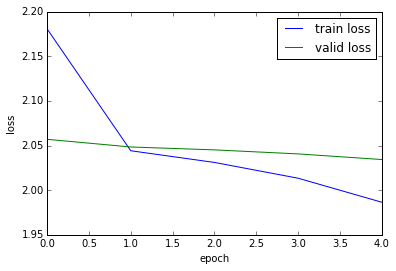

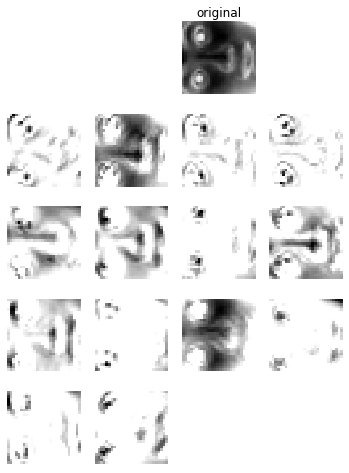

In [100]:
from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion
plot_loss(net1)
plot_conv_activity(net1.layers_[1], X[0:1])